### Function imports

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sys import argv
sns.set_context("talk")
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Input files and merged dataframe

In [15]:
treatments = [
    '1000ng_NoRibo',
    '500ng_NoRibo',
    '100ng_NoRibo',
    '1000ng_Ribodpl',
    '500ng_Ribodpl',
    '100ng_Ribodpl',
    '50ng_Ribodpl',
    '25ng_Ribodpl',
    '10ng_Ribodpl',
    '5ng_Ribodpl_17cyc',
    '5ng_Ribodpl_15cyc',
    '2ng_Ribodpl_17cyc',
    '2ng_Ribodpl_15cyc',
    '1ng_Ribodpl_17cyc',
    '1ng_Ribodpl_15cyc'
]

In [16]:
df_merged = pd.DataFrame()
for treatment in treatments:
    path = '~/vibrio/bioconductor/swt_%s_R1_trim_CDS.tsv' % treatment
    df_single = pd.read_csv(path, sep='\t', header=None, index_col=0)
    df_single.columns = [treatment]
    df_merged = pd.concat([df_merged, df_single], axis=1)
df_merged = df_merged.drop(df_merged.index[-5:])

### Coverage calculation and plot

In [17]:
coverage = df_merged.astype(bool).sum(axis=0)/3815

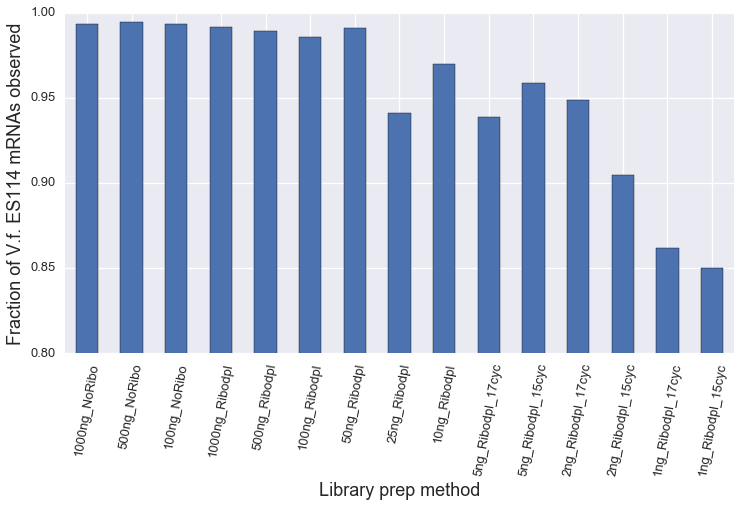

In [18]:
coverage.plot(rot=80, xticks=range(0,len(coverage)), kind='bar')
plt.ylim([.8, 1])
plt.xlabel('Library prep method', fontsize=18)
plt.ylabel('Fraction of V.f. ES114 mRNAs observed', fontsize=18)
plt.savefig('low_biomass_coverage.pdf')

### CDS libraries detected in vs. CDS mean counts per million calculation and plot

In [19]:
df_cpm = df_merged/df_merged.sum()*1e6
cds_mean_cpm = df_cpm.mean(axis=1)

In [20]:
df_detected = (df_merged > 0)
cds_libraries_detected = pd.Series(index=df_detected.index)
for index, row in df_merged.iterrows():
    value_counts = df_detected.loc[index].value_counts()
    if True in value_counts.index:
        cds_libraries_detected.loc[index] = df_detected.loc[index].value_counts().loc[True]
    else:
        cds_libraries_detected.loc[index] = 0

In [21]:
df_cds_plot = pd.concat([cds_mean_cpm, cds_libraries_detected], axis=1)
df_cds_plot.columns = ['mean_cpm', 'num_libr_detected']

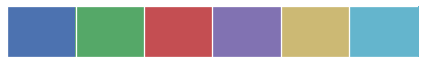

In [22]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [23]:
# seaborn blue
current_palette[0]

(0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

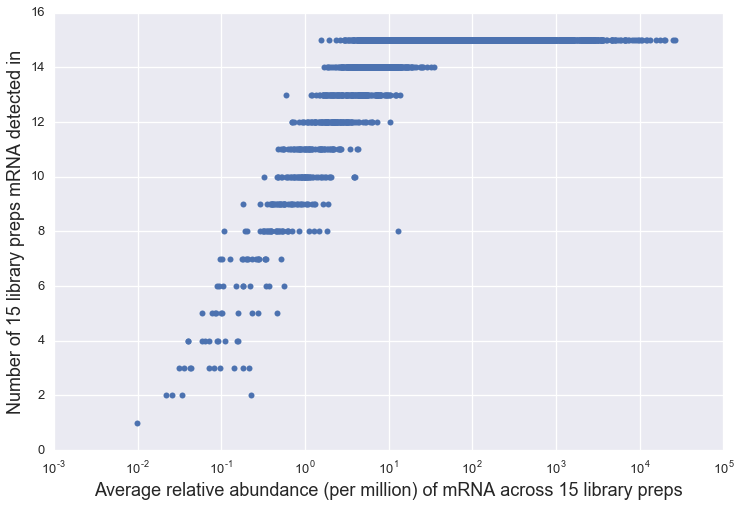

In [28]:
plt.figure()
plt.plot(df_cds_plot['mean_cpm'], df_cds_plot['num_libr_detected'], '.', markersize=12)
plt.xscale('log')
plt.xlabel('Average relative abundance (per million) of mRNA across 15 library preps', fontsize=18)
plt.ylabel('Number of 15 library preps mRNA detected in', fontsize=18)
#plt.savefig('low_biomass_detected.pdf')

In [46]:
plt.scatter?

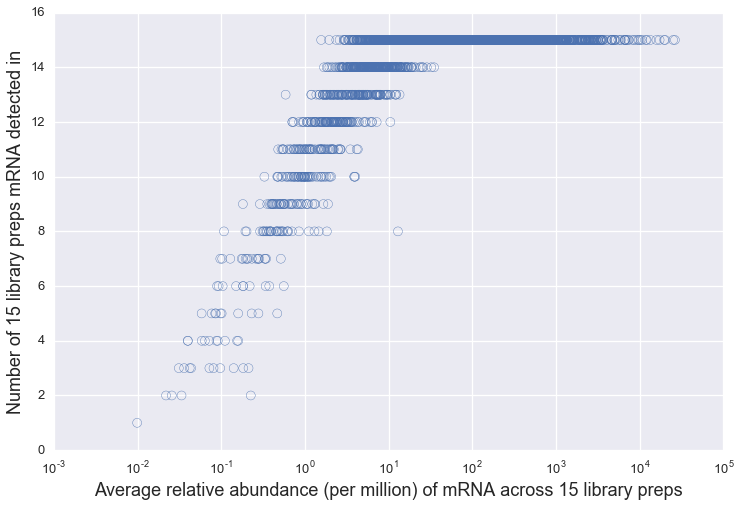

In [45]:
plt.figure()
plt.scatter(list(df_cds_plot['mean_cpm']), list(df_cds_plot['num_libr_detected']), s=80, edgecolor=current_palette[0], facecolor='none')
plt.xscale('log')
plt.xlim([1e-3, 1e5])
plt.ylim([0, 16])
plt.xlabel('Average relative abundance (per million) of mRNA across 15 library preps', fontsize=18)
plt.ylabel('Number of 15 library preps mRNA detected in', fontsize=18)
plt.savefig('low_biomass_detected.pdf')

### R-squared plot

In [25]:
df_rsq = pd.Series([0.932, 0.960, 0.982, 0.993, 0.995, 1.000, 0.943, 0.979, 0.981, 0.946, 0.951, 0.930, 0.929, 0.916, 0.920])
df_rsq.index = coverage.index

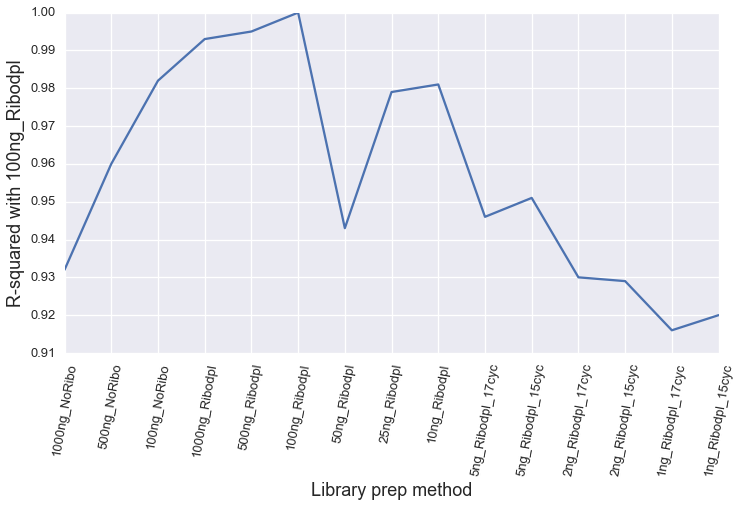

In [26]:
df_rsq.plot(rot=80, xticks=range(0,len(df_rsq)))
plt.xlabel('Library prep method', fontsize=18)
plt.ylabel('R-squared with 100ng_Ribodpl', fontsize=18)
plt.savefig('low_biomass_rsquared.pdf')